# TODO:
- Add something to add a minimap to the delta_twtt plot to show one point in the general area of the crossover points for quick reference
    - or add a plot to the side which displays the continent and a "you are here" star marker IVO the crossover points
- **Implement multi flight crossover point finding**
- Multi flight plotting
    - how many flights could I put in a file together? i.e. can I save a full season to one file in the pickle format?
- scaling for overall depth in twtt? i.e. less effect in shallower ice so you can't really compare to deeper ice CX points



In [1]:
import matplotlib.pyplot as plt
import os
from project_classes import *
from functions import *
from iceflow_library import *
from scipy.optimize import curve_fit
import scipy.optimize as opt

In [2]:
zoom = True
seg_length = 100
# season = "2009_Antarctica_DC8"
season = "2018_Antarctica_DC8" 
# season = "2016_Antarctica_DC8" 
# season = "2014_Antarctica_DC8" 
season = "2022_Antarctica_BaslerMKB"

# flight = "20181030_01"  # the flight date and frame number 
    # that flight only has one point
flight = "20181018_01"
# flight = "20181103_01"
# flight = "20181011_01"
    # one dimensional data error
    # TODO: figure out why 10018 and 1103 have the same data or at least print the same maps and plots
# flight = "20181109_01"
# flight = "20181112_02"  # the problem flight
    # plots fake crossovers along the curved path
# flight = "20161024_05"
# flight = "20161111_05"
    # probably too close to the coast to be useful
# flight = "20161024_05"
# flight = "20141026_06"
flight = "20230127_01"
    # ~ 1/3 of an orbit of the pole and yet the angle plot looks like hot garbage
# file_name = "layer_export_" + flight + ".pickle"
file_name = "C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\layer_export_" + flight + ".pickle"
testing = False

In [3]:
"""
read in the layers from the layer files and save them to a pickle file
"""
# mat_pickler_layer(season, flight, testing_mode=testing)  # make it
# if the file at filename exists, read in the layers from the pickle file

if not os.path.isfile(file_name):  # if the file does not exist
    print(f"File {file_name} does not exist. Making it...")
    mat_pickler_h5py(season, flight, testing_mode=testing)  # make it
    layers = read_layers(file_name)  # read in the layers from the pickle file
    print(f"File {file_name} created.")
else:
    layers = read_layers(file_name)  # read in the layers from the pickle file
    print(f"File {file_name} loaded.")

# mat_pickler_h5py(season, flight, testing_mode=testing)  # make it
# layers = read_layers(file_name)  # read in the layers from the pickle file

Reading pickle file...
--------------------
Surface
Bottom
--------------------

File C:\Users\rj\Documents\cresis_project\pickle_jar\layer_export_20230127_01.pickle loaded.


### read in the iceflow data from the iceflow data files and save them to a pickle file

In [4]:
if not os.path.isfile("C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\iceflow_data.pickle"):  # if the file does not exist
    print("The iceflow data pickle file was not found. Creating a new one...")
    filename = iceflow_saver()
    iceflow_data = iceflow_loader(filename)
    print("The iceflow data pickle file was successfully created.")
# try:
iceflow_data = iceflow_loader("C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\iceflow_data.pickle")
print("The iceflow data pickle file was found and loaded.")

x = iceflow_data[0]
y = iceflow_data[1]
velocity_x = iceflow_data[2]
velocity_y = iceflow_data[3]
latitude = iceflow_data[4]
longitude = iceflow_data[5]
print("iceflow data loaded")

The iceflow data pickle file was found and loaded.
iceflow data loaded


In [5]:
# if the file at filename exists, read in the intersection_indices and intersection_points from the pickle file
# otherwise, find the intersection_indices and intersection_points and save them to a pickle file
filename = f"C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\{season}_{flight}_crossover_points.pickle"
if not os.path.isfile(filename):  # if the file does not exist
    print(f"File {filename} does not exist. Making it...")
    intersection_points, intersection_indices, segment_ends = cross_point(layers[0], seg_length, quiet=True)
    with open(filename, 'wb') as file:
        pickle.dump(intersection_indices, file)
        pickle.dump(intersection_points, file)
        pickle.dump(segment_ends, file)
    print(f"intersection_indices and intersection_points saved to {filename}")
else:
    with open(filename, 'rb') as file:
        intersection_indices = pickle.load(file)
        intersection_points = pickle.load(file)
        segment_ends = pickle.load(file)
    print(f"intersection_indices and intersection_points loaded from {filename}")

intersection_indices and intersection_points loaded from C:\Users\rj\Documents\cresis_project\pickle_jar\2022_Antarctica_BaslerMKB_20230127_01_crossover_points.pickle


In [6]:
""" Current Project 30Jan24 """
# TODO: deconstruct the nested lists and make them make more sense
    # put them in class objects

print(f"intersection_indices: {intersection_indices}")
print(f"intersection_points: {intersection_points}")

intersection_indices: [[29253, 63621], [29936, 57720], [30621, 51984], [31305, 46498], [31990, 39359], [94363, 95865]]
intersection_points: [[array([-85.95336843]), array([-104.31383824])], [array([-85.87623828]), array([-103.61697576])], [array([-85.7982753]), array([-102.94418561])], [array([-85.7198805]), array([-102.29666009])], [array([-85.64084125]), array([-101.67166777])], [array([-89.93770144]), array([-100.44355176])]]


In [7]:
"""
testing gps time to twtt conversion setup
"""
# print the first twtt of the first layer without approximation
print(f"twtt: {layers[0].twtt[0]:.20f}")



twtt: 0.00000366486411524078


Plotting map...


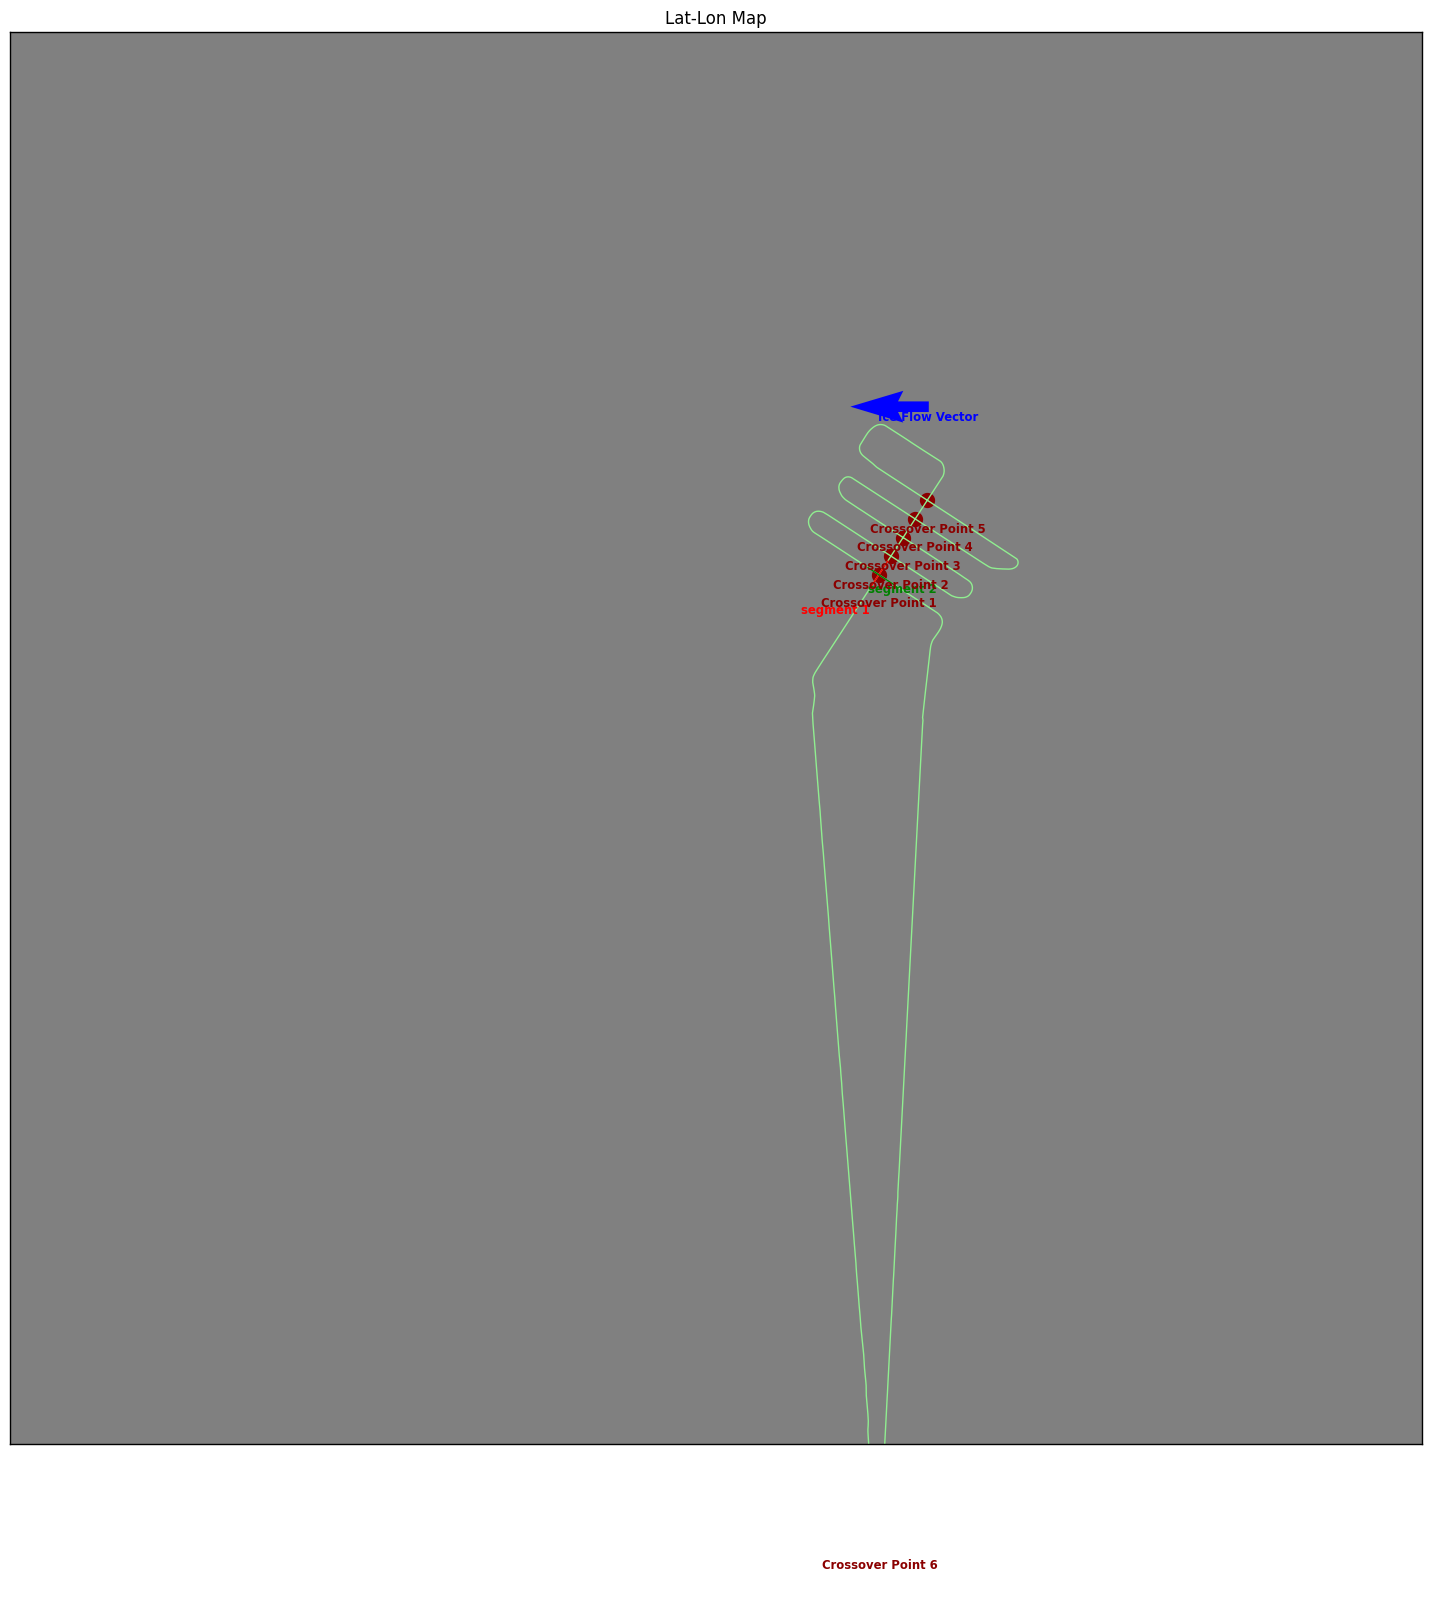

plotted map
--------------------

Plotting layers...
--------------------
Adjusting for surface twtt...
twtt: [2.2062186341800812e-05, 2.2199999664640108e-05]
scale factor: 0.07409554518659446
scale factor: 14.932981487018273


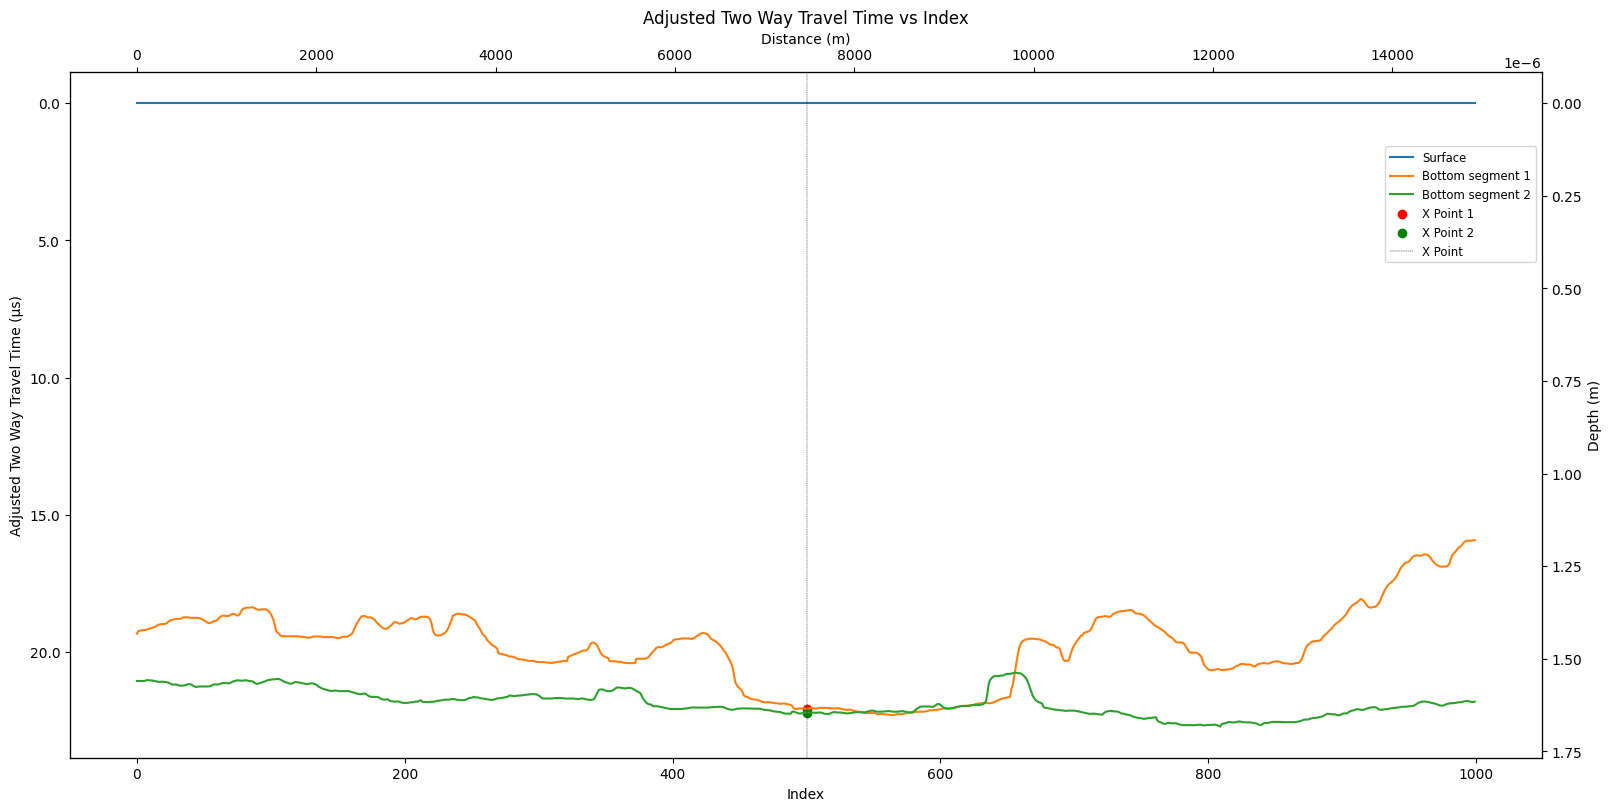

In [8]:
plot_map(layers, intersection_indices, intersection_points, iceflow_data, season, flight,  zoom=False, cross_index=0, filename=(season + "_" + flight + "crossover"))
plot_layers_at_cross(layers, intersection_indices, intersection_points, season, flight, filename=(season + "_" + flight + "crossover"))

3d Layer plot dev

In [9]:
print(layers[1].layer_name)
# print the first 5 twtt points that are not nans in layers[1]
i = 0
count = 0
while count < 2:
    if not np.isnan(layers[1].twtt[i]):
        print(f"twtt[{i}]: {layers[1].twtt[i]}")
        print(f"lat[{i}]: {layers[1].lat[i][0]}")
        print("")
        count += 1
    i += 1


Bottom
twtt[5623]: 3.6793562922467624e-05
lat[5623]: -89.03415186603382

twtt[5624]: 3.680896675351706e-05
lat[5624]: -89.03401757151252



len(layers): 2


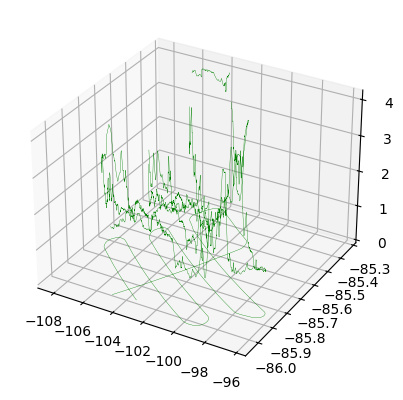

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def plot_layers_3d(layers, season, flight, intersection_indices, ):  
    # plot the layers with respect to lat, lon, and twtt
    # plot a grid of scattered points at 0 twtt to represent the surface
    

    
    
    # convert the lat-lon points to xy points   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # plot the surface
    x = iceflow_data[5][0]
    y = iceflow_data[4][0]
    z = np.zeros_like(x)
    # ax.scatter(x, y, z, c='r', marker='o')
    
    print(f"len(layers): {len(layers)}")
    
    for layer in layers:
        corrected_twtt = layer.twtt - layers[0].twtt
        layer.twtt_corrected = corrected_twtt
        
    lats1 = []
    lons1 = []
    twtts1 = []
    lats2 = []
    lons2 = []
    twtts2 = []
    
    for i in range(len(layers[1].lat)):
        lats1.append(layers[1].lat[i][0])
        lons1.append(layers[1].lon[i][0])
        twtts1.append(layers[1].twtt_corrected[i])
    
    
    offset = 500
    
    # ax.plot(lons1, lats1, twtts1, label='surface', c='g', linewidth=0.25)
    ax.plot(lons1[intersection_indices[0][0] - offset:intersection_indices[0][1] + offset], lats1[intersection_indices[0][0] - offset:intersection_indices[0][1] + offset], twtts1[intersection_indices[0][0] - offset:intersection_indices[0][1] + offset], label='surface', c='g', linewidth=0.25)

    
    # project the layers onto the bottom of the plot
    zeroes = np.zeros_like(twtts1)
    ax.plot(lons1[intersection_indices[0][0] - offset:intersection_indices[0][1] + offset], lats1[intersection_indices[0][0] - offset:intersection_indices[0][1] + offset], zeroes[intersection_indices[0][0] - offset:intersection_indices[0][1] + offset], label='surface', c='g', linewidth=0.25)

    plt.show()
    
plot_layers_3d(layers, season, flight, intersection_indices)

In [11]:
plot_layers_3d(layers, season, flight)

TypeError: plot_layers_3d() missing 1 required positional argument: 'intersection_indices'

# TODO:
    - thought: just use mpl3d and convert the lat-lons to an x-y convention
        - but probably not the one that MEASURES is using

In [ ]:

# importing mplot3d toolkits, numpy and matplotlib
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

In [ ]:
# twtt 1 = 1.4212416976291829e-05
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)[0]
print(f"twtt: {twtt}")

# twtt 2 = 1.395535327834069e-05

# find the depth of both twtt 1 and 2

depth1 = twtt_to_depth(twtt[0], refractive_index=1.77)
print(f"depth1: {depth1}")
depth2 = twtt_to_depth(twtt[1], refractive_index=1.77)
print(f"depth2: {depth2}")

# find the difference in depth
print(f"depth2 - depth1: {depth2 - depth1}")

deltatwtt = twtt[1] - twtt[0]
print(f"delta twtt: {deltatwtt}")

### Pressing TODO Items:
- why are the flow headings fluctuating so much?
    - **latlon_to_xy** is not working correctly
        ```
        input lat-lon: (array([-82.6583544]), array([-46.40323858]))
        output x: -550791, y: 578453
      
        IndexError: index -550791 is out of bounds for axis 0 with size 12445
        ```
        - the array is only 12445 long, so the x and y values are way off
    - investigate xyindex_vector_to_heading()
    - or what we are feeding it, i.e. why would it be drawing from different points?
    - rework xyindex_vector_to_heading() to use points instead of indices
        - possibly go back to spiral search
        - plot the actual point on the map then plot the spiral points and the point that is selected

In [ ]:
"""
remove and update the iceflow library once this works
"""
def xyindex_vector_to_heading(x_index, y_index, x_vector, y_vector):
    """
    This function is used to convert an x and y vector in EPSG:3031 to a heading in EPSG:4326.
    :param x_index: the x coordinate
    :param y_index: the y coordinate
    :param x_vector: the x vector
    :param y_vector: the y vector
    :return: the heading in EPSG:4326
    """
    # convert the x and y indices to x and y coordinates
    x, y = index_to_x(x_index), index_to_y(y_index)
    
    base_plus_x_vector = x + x_vector
    base_plus_y_vector = y + y_vector
    
    # convert the x and y vector to lat and lon
    lat_vector, lon_vector = xyindex_to_latlon(base_plus_x_vector, base_plus_y_vector)

    # calculate the heading of the vector    
    # convert the x and y indices to lat and lon
    lat, lon = xyindex_to_latlon(x_index, y_index)
    geodesic = pyproj.Geod(ellps='WGS84')
    angle1, angle2, distance = geodesic.inv(lon, lat, lon_vector, lat_vector)
    return angle1, angle2, distance

In [ ]:
# repeat the above for every crossover point
flow_xy = [] # the flow vector in xy 
flow_heading_full = [] # the flow vector heading in angle1, angle2, distance (in meters)
flow_heading = []
plane_heading_1 = []
plane_heading_2 = []
angle = [] # the angle between the flow vector and the plane heading
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
delta_twtt = []
depth1 = []
depth2 = []
depth = []

for i in range(len(intersection_indices)):
    # convert the lat-lon point to xy and then to indices
    lat, lon = intersection_points[i] 
    # print(f"lat-lon {i}: \t\t{lat[0], lon[0]}")
    
    x, y = latlon_to_xy(lat, lon)
    # print(f"x: {x}, y: {y}")
    
    x_index, y_index = x_to_index(x), y_to_index(y)
    # print(f"x_index: {x_index}, y_index: {y_index}")
    
    nearest_x_index, nearest_y_index = xy_to_nearest_unmasked_index(x, y, iceflow_data, max_radius=10)
    
    # find the nearest good iceflow_data to the crossover point
    nearest_lat = iceflow_data[4][nearest_x_index][nearest_y_index]
    nearest_lon = iceflow_data[5][nearest_x_index][nearest_y_index]
    # print(f"nearest_lat-lon: \t{nearest_lat, nearest_lon}")

    flow_xy.append([iceflow_data[2][nearest_x_index][nearest_y_index], iceflow_data[3][nearest_x_index][nearest_y_index]])
    print(f"flow at nearest: {flow_xy[i]}")
    
    # find the heading of the flow vector   
    flow_heading_full.append(xyindex_vector_to_heading(nearest_x_index, nearest_y_index, flow_xy[i][0], flow_xy[i][1]))
    flow_heading.append(flow_heading_full[i][0])
    print(f"flow_heading[{i}]: {flow_heading[i]}")

    # find the heading of the first segment
    plane_heading_1.append(find_heading(layers[0], intersection_indices[i][0]))
    # print(f"heading_1[{i}]: {plane_heading_1[i]}")

    # find the heading of the second segment
    plane_heading_2.append(find_heading(layers[0], intersection_indices[i][1]))
    # print(f"heading_2[{i}]: {plane_heading_2[i]}")
    
    # plane_flow_angle = min(abs(plane_heading_1[i] - flow_heading[i]), abs(plane_heading_2[i] - flow_heading[i]))
    plane_flow_angle = max(abs(plane_heading_1[i] - flow_heading[i]), abs(plane_heading_2[i] - flow_heading[i]))

    # print(f"plane_flow_angle: {plane_flow_angle}")
    angle.append(plane_flow_angle)
    
    # find the twtt at the crossover point on both segments
    # print(f"twtt{i}: {twtt[i]}")
    # delta_twtt.append(twtt[i][1] - twtt[i][0])
    # append the absolute value of the twtt
    delta_twtt.append(abs(twtt[i][1] - twtt[i][0]))
    print(f"twtt[{i}]: {twtt[i][0]:.20f}, {twtt[i][1]:.20f}")
    print(f"delta_twtt[{i}]: {delta_twtt[i]:.20f}")
    
    # print the depth of the crossover point
    depth1 = np.append(depth1, twtt_to_depth(twtt[i][0], refractive_index=1.77))
    depth2 = np.append(depth2, twtt_to_depth(twtt[i][1], refractive_index=1.77))
    print(f"depth1: {depth1}, depth2: {depth2}")
    depth.append((depth1[i] + depth2[i]) / 2)

    print(section_break)


length = len(delta_twtt)
while i < length: # remove any nan valued points from the lists
    if math.isnan(delta_twtt[i]):
        delta_twtt.pop(i)
        flow_xy.pop(i)
        angle.pop(i)
        # magnitude.pop(i)
        plane_heading_1.pop(i)
        plane_heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        print(f"intersection {i} removed")
        print(section_break)
        length -= 1
    else:
        i += 1
        

# Pressing TODO
- point conversion seems to be working so far
    - it does convert negative longitudes to positive longitudes, not sure if that makes a difference
- need to investigate wht flow headings are varying over small distances

In [ ]:
# print the lat-lon of the crossover points
print(season + " " + flight)
for i in range(len(intersection_points)):
    print(f"intersection {i}: {intersection_points[i]}")
    #print the depth of the crossover points
    print(f"depth1: {depth1[i]}, depth2: {depth2[i]}, average: {depth[i]}")
    print("")

# TODO: functionize this plot once it works

Using nanoseconds


C:\Users\rj\AppData\Local\Temp\ipykernel_32108\3273429621.py:101: RankWarning: Polyfit may be poorly conditioned
  model5 = np.poly1d(np.polyfit(x, y, 5))


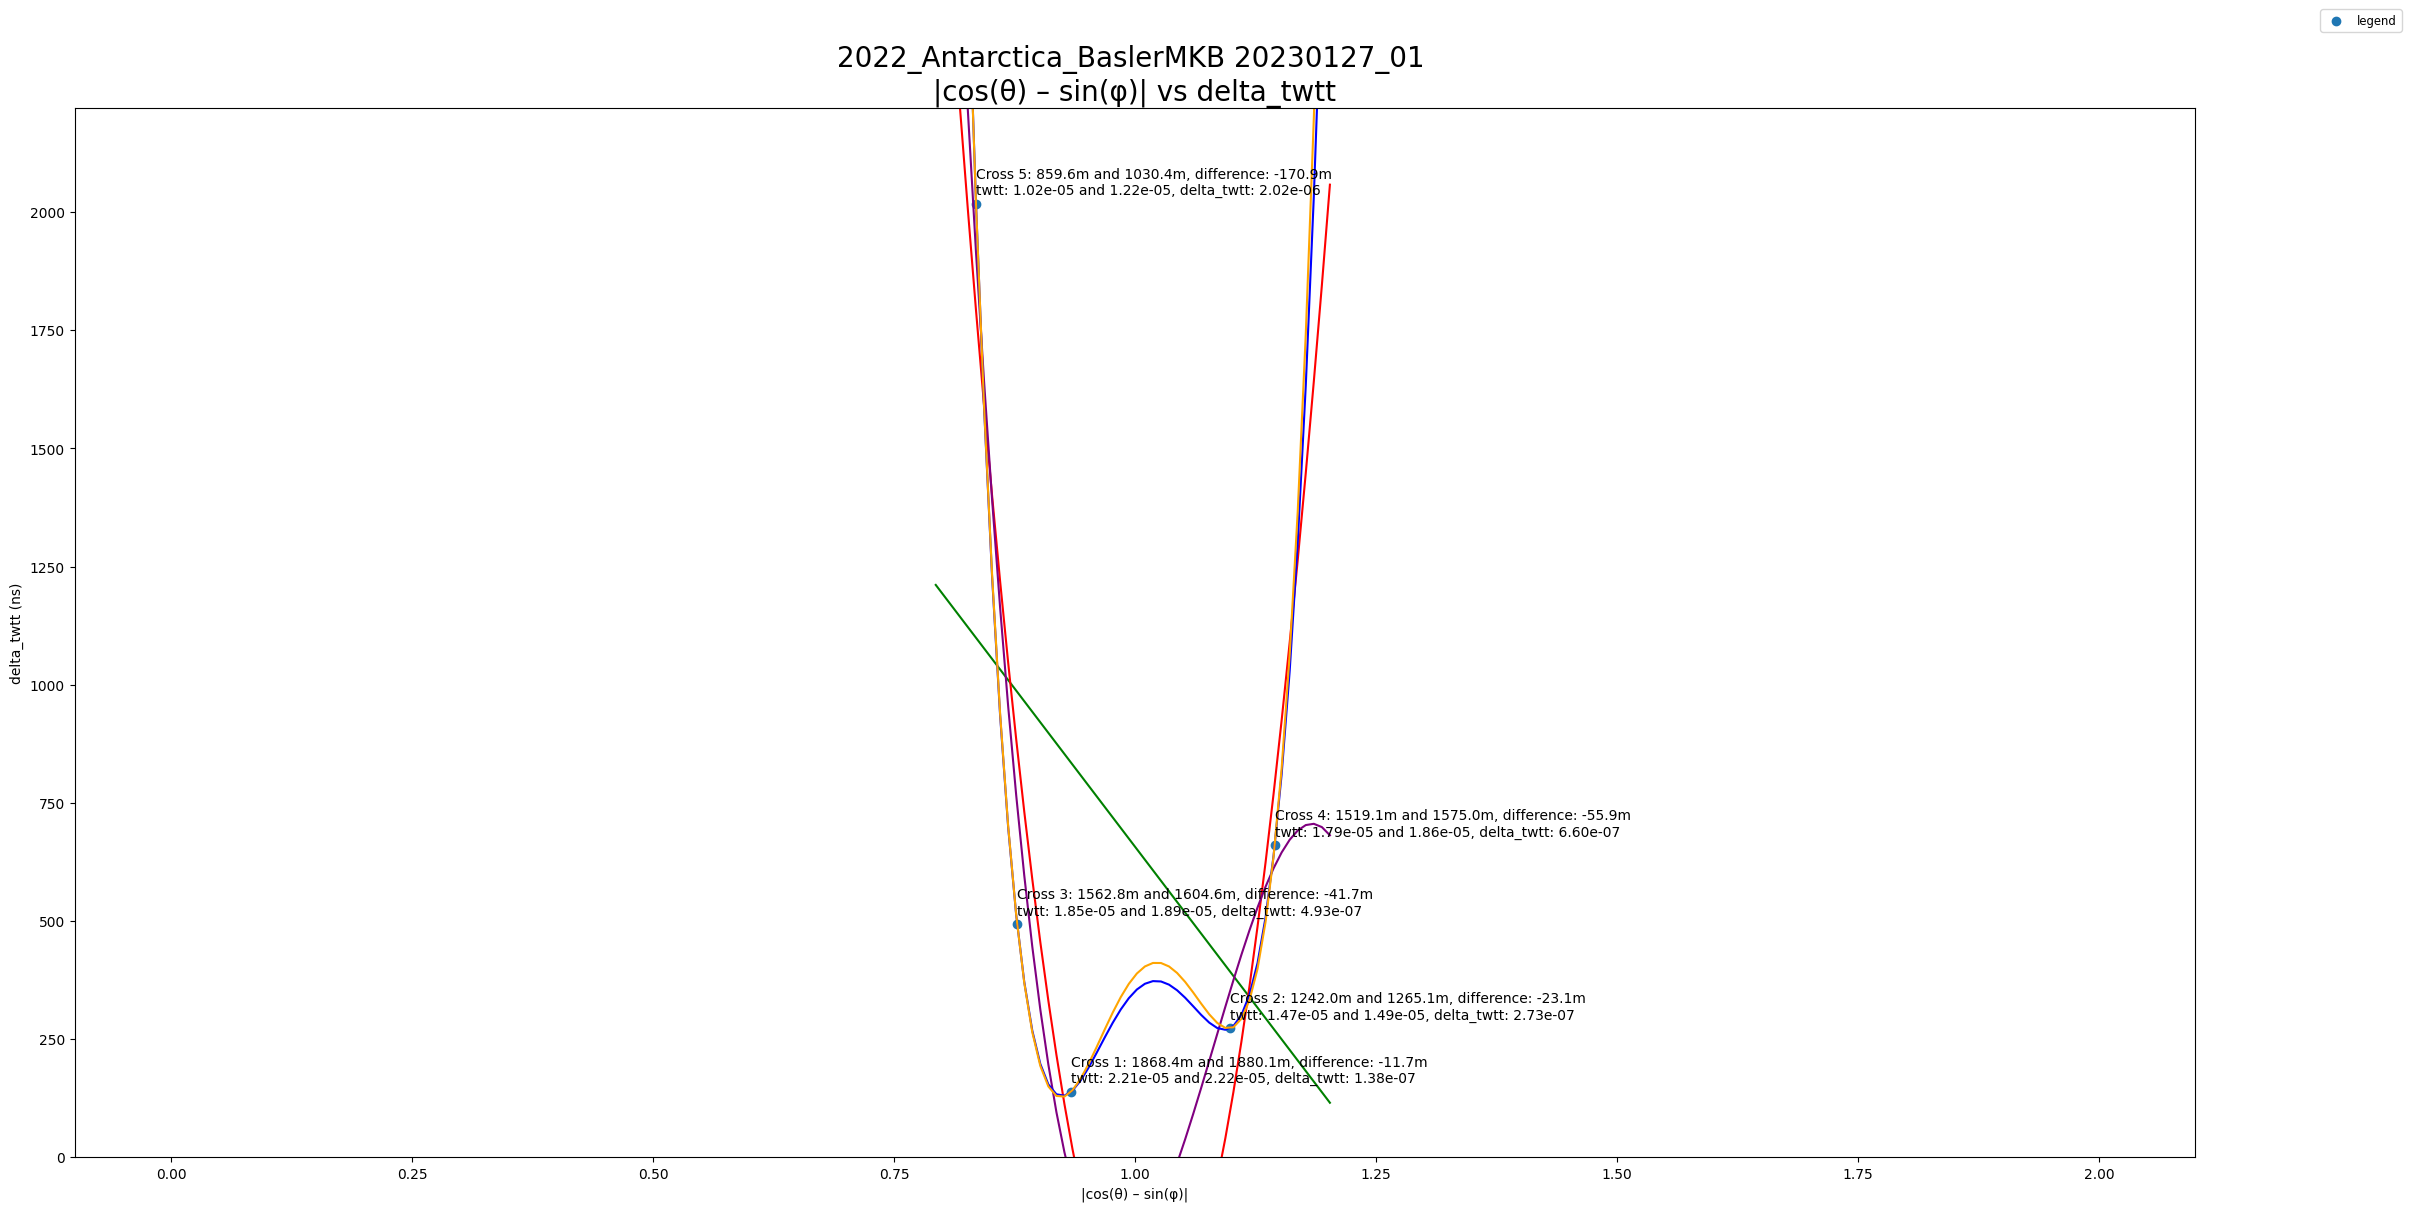

saved plot as C:\Users\rj\Documents\cresis_project\screens\2022_Antarctica_BaslerMKB_20230127_01_cos_angle_heading_vs_delta_twtt.png


In [15]:
# TODO: verify this plot is correct
# TODO: verify the Y scale and label it
    # Dave expects the delta_twtt to be ~55ns per his previous measurements
    # I am getting ~550ns for delta_twtt
    
micro = False
print_time = True

# plot delta_twtt vs |cos(angle - heading) - sin(angle - heading)| * |magnitude|  for each crossover point
plt.figure(figsize=(24, 12), layout='constrained')
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1)))) * np.abs(np.array(magnitude)), delta_twtt, label='segment 1')
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_2)))) * np.abs(np.array(magnitude)), delta_twtt, label='segment 2')

# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(plane_heading_1)))), delta_twtt, label='segment 1')  # angle - heading
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(plane_heading_2)))), delta_twtt, label='segment 2')

# cos(angle - heading) vs delta_twtt
# plt.scatter(np.abs(np.cos(np.radians(np.array(flow_heading) - np.array(plane_heading_1)))), delta_twtt, label='segment 1')  # flow angle - heading
# plt.scatter(np.abs(np.cos(np.radians(np.array(flow_heading) - np.array(plane_heading_2)))), delta_twtt, label='segment 2')

# |cos(angle - heading) - sin(angle - heading) |vs delta_twtt
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(plane_heading_1))) - np.sin(np.radians(np.array(angle) - np.array(plane_heading_1)))), delta_twtt, label='segment 1')  # angle - heading
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(plane_heading_2))) - np.sin(np.radians(np.array(angle) - np.array(plane_heading_2)))), delta_twtt, label='segment 2')

# |cos(θ) – sin(φ)| vs delta_twtt. theta is the angle between the flow vector and the plane heading on segment 1, phi is the angle between the plane headings on segments 1 and 2
xdata = []
ydata = []
for i in range(len(delta_twtt)):
    theta = angle[i]
    phi = abs(plane_heading_1[i] - plane_heading_2[i])
    # print(f"theta: {theta}, phi: {phi} for i: {i}\n cos(theta): {np.cos(np.radians(theta))}, sin(phi): {np.sin(np.radians(phi))}")
    # plt.scatter(np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))), delta_twtt[i], label='segment 1')  # angle - heading   
    delta_twtt_micros = delta_twtt[i] * 1e6
    delta_twtt_ns = delta_twtt[i] * 1e9
    
    xdata = np.append(xdata, np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))))  # |cos(θ) – sin(φ)|
    # xdata.append(np.cos(np.radians(theta)) - np.abs(np.sin(np.radians(phi))))  # cos(θ) – |sin(φ)| <- this is the same as above except negative
    # xdata.append(np.cos(np.radians(theta)) - np.sin(np.radians(phi)))  # cos(θ) – sin(φ)
    if micro:    
        delta_twtt_unit = delta_twtt_micros  # delta_twtt (µs)
        if print_time: 
            print("Using microseconds")
            print_time = False
    else:
        delta_twtt_unit = delta_twtt_ns  # delta_twtt (ns)
        if print_time: 
            print("Using nanoseconds")
            print_time = False
            
    ydata = np.append(ydata, delta_twtt_unit)

# print(f"ydata: {ydata}")
# print(f"ydata[1]: {ydata[1]}")

# print(f"depth[1]: {depth[1]}")

y_label_offset = max(ydata) * .01
for i in range(len(xdata)):
    # plt.text(xdata[i], ydata[i] + y_label_offset, f"Cross {i+1}: {depth[i]:.1f}m", fontsize=10)
    plt.text(xdata[i], ydata[i] + y_label_offset, f"Cross {i+1}: {depth1[i]:.1f}m and {depth2[i]:.1f}m, difference: {depth1[i] - depth2[i]:.1f}m\ntwtt: {twtt[i][0]:.2e} and {twtt[i][1]:.2e}, delta_twtt: {twtt[i][1] - twtt[i][0]:.2e}", fontsize=10)
    # plt.text(np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))), ydata[i], f"{depth[i]}", fontsize=10)
 
    # add a label with the depth of the crossover point near the point
    # try: 
        # plt.text(np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))), delta_twtt[i], f"{depth[i]:.2f}", fontsize=10)
        # plt.text(np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))), delta_twtt[i], f"{depth[i]}", fontsize=10)
    # except:
    #     print(f"error at {i}")
    #     print(f"type of theta: {type(theta)}")
    #     print(f"type of phi: {type(phi)}")
    #     print(f"type of depth: {type(depth[i])}")
        
# print(f"xdata: {xdata}")
plt.scatter(xdata,ydata)

# for each point, print the index and the delta_twtt
# for i in range(len(delta_twtt)):
#     plt.text(np.abs(np.cos(np.radians(np.array(flow_heading[i]) - np.array(plane_heading_1[i])))), delta_twtt[i], f"{i}: {delta_twtt[i]}")

# plt.xlabel(" |cos(angle - heading)| * |velocity|")
# plt.xlabel(" |cos(angle - heading)|")
plt.xlabel("|cos(θ) – sin(φ)|")

# plt.title(" |cos(angle - heading)| vs delta_twtt")
# plt.title(f"{season} {flight} \n|cos(angle - heading)| vs delta_twtt", fontsize=20)
plt.title(f"{season} {flight} \n|cos(θ) – sin(φ)| vs delta_twtt", fontsize=20)


plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))
# scale axes to be logarithmic
# plt.xscale('log')
plt.yscale('log')

x = xdata
y = ydata
#fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))

#create scatterplot
polyline = np.linspace(.95 * min(xdata), 1.05 * max(xdata), 50)
# plt.scatter(df.x, df.y)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
plt.plot(polyline, model5(polyline), color='orange')



# get the current directory
dir = os.getcwd()

# save the plot as a png file with a high dpi named after the season and flight
# plt.savefig(f"C:\\Users\\rj\Documents\\cresis_project\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt_logy.png", dpi=300)
plt.savefig(f"{dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt_logy.png", dpi=300)

# set the y max to 1.1 * the max delta_twtt

if micro:
    plt.ylim(1 * 10 ** -16, 1.1 * abs(max(ydata))) # setting the low bound to 0 caused a warning. Apparently 0 is a negative number.
    plt.ylabel("delta_twtt (µs)")
else:
    plt.ylim(1 * 10 ** -16, 1.1 * abs(max(ydata))) # setting the low bound to 0 caused a warning. Apparently 0 is a negative number.
    plt.ylabel("delta_twtt (ns)")
# print(f"abs(max(delta_twtt)): {abs(max(delta_twtt))}")
# set the x bounds to -0.1 to 2.1
plt.xlim(-0.1, 2.1)


plt.yscale('linear')
# save the plot as a png file with a high dpi named after the season and flight
plt.savefig(f"{dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt_lineary.png", dpi=300)
plt.show()

print(f"saved plot as {dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt.png")
# |cos(90) - sin(90)| = 0 - 1 = 1
# plot should peak either at 1 or 0 depending on which flight is closer to the flow vector
    # in theory it should be around 1 but it could be 0 if coded wrong

# END OF RELEVANT CODE FOR ARA TALK

In [14]:
# x_data = np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1))))
# y_data = delta_twtt
# 
# # Define the Gaussian function
# def gaussian(x, amplitude, mean, stddev):
#     return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))
# 
# # Initial parameter guesses: amplitude close to your data's scale, mean around the center, and a reasonable stddev
# initial_guesses = [1e-8, 0.5, 0.1]
# 
# # Use curve_fit to fit the Gaussian function to your data
# popt, pcov = opt.curve_fit(gaussian, x_data, y_data, p0=initial_guesses, maxfev=5000)
# 
# # Plot the original data
# plt.scatter(x_data, y_data, label='Data')
# 
# # Plot the fitted curve
# x_fit = np.linspace(min(x_data), max(x_data), 1000)
# y_fit = gaussian(x_fit, *popt)
# plt.plot(x_fit, y_fit, color='red', label='Fitted curve')
# 
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
# plt.title('Gaussian Fit to Data')
# plt.legend()
# plt.show()

ntuple-ize
    cos(heading-flow)
    difference in theta paralell and perpindicular
    delta_twtt
    v_flow
- stop selecting for angle in upper cells, we can cut the data once we have it

ARA meeting in March Columbus
- talk to Kiet about how he is setting up travel

In [15]:
heading = []
# for each plane heaading, add [plane_heading_1, plane_heading_2] to the heading list
for i in range(len(plane_heading_1)):
    heading.append([plane_heading_1[i], plane_heading_2[i]])

In [16]:
print(flow_xy)

[[1.3169883, 0.051254235], [1.0446994, -0.23636414], [0.83042455, -0.5149757], [0.67551607, -0.661978], [0.14519735, -0.44894293]]


In [17]:
# # save the posit to a json file
# import json
# 
# filename = f"{season}_crossover_data.json"
# 
# # check to see if the file exists and if it does, load the data from it, otherwise append the data to a new file
# try:
#     with open(filename, 'r') as file:
#         data = json.load(file)
#         print(f"File {filename} exists. Loading data from file...")
# except FileNotFoundError:
#     print(f"File {filename} does not exist. Creating a new file...")
#     data = []
#     
# # if the data is not already in the file, append the data to the file
# if data:
#     print(f"Data already in file {filename}.")
# else:
#     print(f"Appending data to file {filename}...")
#     data.append({
#         "season": season,
#         "flight": flight,
#         "intersection_points": intersection_points,
#         "twtt": twtt,
#         "delta_twtt": delta_twtt,
#         "ice flow vectors (m/yr, in xy)": flow,
#         "ice flow angle": angle,
#         "ice flow magnitude": magnitude,
#         "plane heading": heading
#     })
#     with open(filename, 'w') as file:
#         json.dump(data, file)
#     print(f"Data successfully appended to file {filename}.")
# 
# 
# # TODO: convert flow vector and angle to EPSG:4326

### vector to heading dev below, DELETE WHEN FUNCTIONAL

In [18]:
def nearest_flow_to_latlon(lat, lon, iceflow_data, print_point=False):
    """
    :param lat: the latitude of the point
    :param lon: the longitude of the point
    :param iceflow_data: the iceflow data
    :return: the nearest flow vector to the lat-lon point available in the iceflow data 
    """
    # find the nearest x and y values in the iceflow data
    x, y = latlon_to_xy(lat, lon)
    x, y = find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=1000)
    if print_point:
        print(f"Nearest point to lat-lon: {xyindex_to_latlon(x, y)} or {x, y} in EPSG:3031")
    flow = flow_at_x_y(x, y, iceflow_data)
    return flow

In [19]:
intersect_x = intersection_points[0][0]
intersect_y = intersection_points[0][1]
print(f"Intersection lat-lon:\n{intersect_x, intersect_y}")
print("----------------------\n")

x, y = latlon_to_xy(intersect_x, intersect_y)
print(f"x, y of intersection before index conversion \nx: {x}, y: {y}\n")

x_index = x_to_index(x)
y_index = y_to_index(y)
print(f"converted to indices:\nx_index: {x_index}, y_index: {y_index}\n")
x_lat, y_lat = xyindex_to_latlon(x_index, y_index)
print(f"lat-lon of indices: \n{x_lat, y_lat}\n")

difference_lat = intersect_x - x_lat
difference_lon = intersect_y - y_lat
print(f"difference in lat-lon: \n{difference_lat, difference_lon}\n")
# So the conversion functions work

Intersection lat-lon:
(array([-85.95336843]), array([-104.31383824]))
----------------------

x, y of intersection before index conversion 
x: 108745, y: 426197

converted to indices:
x_index: 6464, y_index: 5276

lat-lon of indices: 
(-89.92320626202974, -140.7782340910979)

difference in lat-lon: 
(array([3.96983783]), array([36.46439586]))



### TODO: fix the find nearest functions

In [20]:
def xy_to_nearest_unmasked_index(x, y, iceflow_data, max_radius=10, printout=False):
    """
    Find the nearest x and y value in the iceflow data to an input x and y value.
    """
    # iterate through every data point within the max_radius of the input x and y and save the xy pairs of any unmasked data
    x = x_to_index(x)
    y = y_to_index(y)
    unmasked = []
    for x_iterator in range(x - max_radius, x + max_radius):
        for y_iterator in range(y - max_radius, y + max_radius):
            if (
                    0 <= x_iterator < iceflow_data[2].shape[0]  # if the x index is within the bounds of the iceflow data
                    and 0 <= y_iterator < iceflow_data[2].shape[1]
                    and not np.ma.is_masked(iceflow_data[2][x_iterator][y_iterator])
                    and not np.ma.is_masked(iceflow_data[3][x_iterator][y_iterator])
            ):
                unmasked.append((x_iterator, y_iterator))
            if printout and not np.ma.is_masked(iceflow_data[2][x_iterator][y_iterator]):
                print(f"unmasked x: {x_iterator}, unmasked y: {y_iterator}")
                print(f"unmasked lat: {iceflow_data[4][x_iterator][y_iterator]}, unmasked lon: {iceflow_data[5][x_iterator][y_iterator]}")
                print(f"unmasked flow: {iceflow_data[2][x_iterator][y_iterator]}, {iceflow_data[3][x_iterator][y_iterator]}")
    # find the xy pair with the minimum distance from the input x and y
    min_distance = 100
    min_x = None
    min_y = None
    for x_iterator, y_iterator in unmasked:
        distance = math.sqrt((x - x_iterator) ** 2 + (y - y_iterator) ** 2)
        if distance < min_distance:
            min_distance = distance
            min_x = x_iterator
            min_y = y_iterator
    # TODO: figure out why these are indices and not x and y
        # it works fine, they just are.
    return min_x, min_y

In [21]:
lat = intersection_points[0][0]
lon = intersection_points[0][1]
print(f"lat: {lat}, lon: {lon}")

x, y = latlon_to_xy(lat, lon)
print(f"x: {x}, y: {y}")

x_index, y_index = x_to_index(x), y_to_index(y)
print(f"x_index: {x_index}, y_index: {y_index}")

# nearest_x_index, nearest_y_index = depracated: find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=1000)

nearest_x_index, nearest_y_index = xy_to_nearest_unmasked_index(x, y, iceflow_data, max_radius=10)

print(f"nearest_x_index: {nearest_x_index}, nearest_y_index: {nearest_y_index}")
nearest_lat = iceflow_data[4][nearest_x_index][nearest_y_index]
nearest_lon = iceflow_data[5][nearest_x_index][nearest_y_index]
print(f"nearest_lat: {nearest_lat}, nearest_lon: {nearest_lon}")
print(f"flow at nearest: {iceflow_data[2][nearest_x_index][nearest_y_index]}, {iceflow_data[3][nearest_x_index][nearest_y_index]}")

lat: [-85.95336843], lon: [-104.31383824]
x: 108745, y: 426197
x_index: 6464, y_index: 5276
nearest_x_index: 6464, nearest_y_index: 5276
nearest_lat: -85.95678327250673, nearest_lon: 255.66652862886244
flow at nearest: 1.3169883489608765, 0.051254235208034515


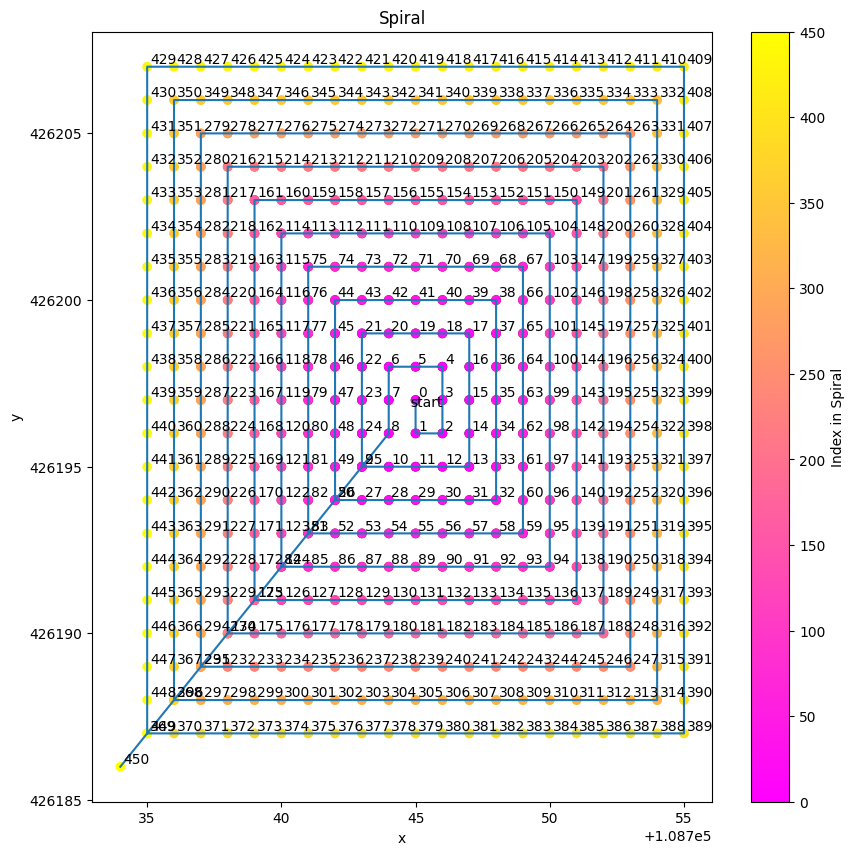

In [22]:
# plot the spiral around the point
plot_spiral(x,y, 10)

### Move to an example notebook when done. Shows how the xy to index conversion works

In [ ]:
#print x min and max
min = np.min(iceflow_data[0])
max = np.max(iceflow_data[0])

print(f"min: {min}, max: {max}")

print(f"min/450: {min/450}, max/450: {max/450}")

one, two, three = (iceflow_data[1][0], iceflow_data[1][1], iceflow_data[1][2])
print(f"one: {one}, two: {two}, three: {three}")
print(f"one - two: {one - two}, two - three: {two - three}")

In [ ]:
def x_to_index(x):
    return 6223 + int(x/450)
def y_to_index(y):
    return 6223 - int(y/450)
def index_to_x(x):
    return (x - 6223) * 450
def index_to_y(y):
    return (6223 - y) * 450

In [ ]:
def xyindex_vector_to_heading(x_index, y_index, x_vector, y_vector):
    """
    This function is used to convert an x and y vector in EPSG:3031 to a heading in EPSG:4326.
    :param x_index: the x coordinate
    :param y_index: the y coordinate
    :param x_vector: the x vector
    :param y_vector: the y vector
    :return: the heading in EPSG:4326
    """
    # convert the x and y coordinates to lat and lon
    lat, lon = xyindex_to_latlon(x_index, y_index)
    # convert the x and y vector to lat and lon
    lat_vector, lon_vector = xyindex_to_latlon(x_index + x_vector, y_index + y_vector)
    # calculate the heading
    geodesic = pyproj.Geod(ellps='WGS84')
    angle1, angle2, distance = geodesic.inv(lon, lat, lon_vector, lat_vector)
    return angle1, angle2, distance



# TODO: ~~take some plane vectors, convert the relevant points to xy, then run them through the heading function to see if it works compared to the plane heading~~
- I think this works now

In [ ]:
# for testing purposes only, delete when done
def find_heading_test(lat1, lon1, lat2, lon2):
    # print the lat-lon points
    # print(f"lat-lon input to find_heading:"
    #       f"\n({layer.lat[index]}, {layer.lon[index]})")
    geodesic = pyproj.Geod(ellps='WGS84')
    # lon = layer.lon[index]
    # lat = layer.lat[index]
    # lon1 = layer.lon[index - window_size]
    # lat1 = layer.lat[index - window_size]
    # lon2 = layer.lon[index + window_size]
    # lat2 = layer.lat[index + window_size]

    print(f"lat-lons determined by find_heading:"
          f"\n({lat1}, {lon1}), ({lat2}, {lon2})")
    # delta_lon1 = lon - lon1
    # delta_lat1 = lat - lat1
    # delta_lon2 = lon2 - lon
    # delta_lat2 = lat2 - lat
    # print(f"delta_lon1: {delta_lon1}, delta_lat1: {delta_lat1}, delta_lon2: {delta_lon2}, delta_lat2: {delta_lat2}")
    fwd_azimuth, back_azimuth, distance = geodesic.inv(lon1, lat1, lon2, lat2)
    return fwd_azimuth

In [ ]:
def find_heading_points(layer, index, window_size=100):
    """
    :param layer: a Layer object
    :param index: the index of the point in the layer
    :param window_size: the number of points to use in the slope calculation
    :return: the bearing of the current that flew through the points.
    This has nothing to do with the slope of the layer. only the lat-lon points.
    """
    # print the lat-lon points
    print(f"lat-lon input to find_heading:"
          f"\n\t({layer.lat[index]}, {layer.lon[index]})")
    geodesic = pyproj.Geod(ellps='WGS84')
    lon = layer.lon[index]
    lat = layer.lat[index]
    lon1 = layer.lon[index - window_size]
    lat1 = layer.lat[index - window_size]
    lon2 = layer.lon[index + window_size]
    lat2 = layer.lat[index + window_size]
    
    return lon1, lat1, lon2, lat2

In [ ]:
# TODO: when this works, udpate the original code cell to use the non test versions of the iceflow heading function
# TODO, the iceflow heading finder doesn't work on too close of data because they show up as the same index in the iceflow data.
    # put in some larger fake lat-lons to test both
    # how was it working before then?
        # the flow vector comes from the data so it works
magnitude = []
plane_heading_1 = []
plane_heading_2 = []
# for i in range(len(intersection_indices)):
for i in range(1):
    # find the heading of the first segment
    test_lat1 = -81.1 
    test_lon1 = -29.7
    test_lat2 = -81.2
    test_lon2 = -29.8
    plane_heading_1.append(find_heading_test(test_lat1, test_lon1, test_lat2, test_lon2))
    print(f"heading_1[{i}]: {plane_heading_1[i]}")
    
    print("**************")

    # convert the test lat-lon points to xy
    x1, y1 = latlon_to_xy(test_lat1, test_lon1) 
    x2, y2 = latlon_to_xy(test_lat2, test_lon2)
    print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")
    
    # convert the xy points to indices
    x1_index = x_to_index(x1)
    y1_index = y_to_index(y1)
    x2_index = x_to_index(x2)
    y2_index = y_to_index(y2)
    print(f"x1_index: {x1_index}, y1_index: {y1_index}, x2_index: {x2_index}, y2_index: {y2_index}")
    
    # TODO: should this be a vector of indices or x and y? x and y sounds right but it errors out on index overflow. Have to go to class so can't look right now. Does the xy_vector function use indices or x and y? 
        # the vector_to_heading() function uses indices for some reason but it works so I'mma let it ride
    vector = [x2_index - x1_index, y2_index - y1_index]
    # vector = [x2 - x1, y2 - y1]

    # convert the vector to a heading
    heading = xyindex_vector_to_heading(x1_index, y1_index, vector[0], vector[1])
    
    print(f"heading by way of iceflow functions: \n{heading}")
    
    
    
    print(section_break)
    
    


In [ ]:
# calculate the twtt to depth conversion for 10, 20, ..., 100 microseconds

twtt = np.arange(10, 110, 10) * 1e-6
depth = twtt_to_depth(twtt, refractive_index=1.77)

# for each twtt, print the twtt in microseconds and the depth in meters. both should be rounded to 0 decimal places
print(f"twtt to depth conversion for refractive index 1.77:")
for i in range(len(twtt)):
    print(f"{twtt[i] * 1e6:.0f} {chr(956)}s:\t{depth[i]:.0f} meters")